In [1]:
from sklearn.datasets import make_blobs

In [12]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

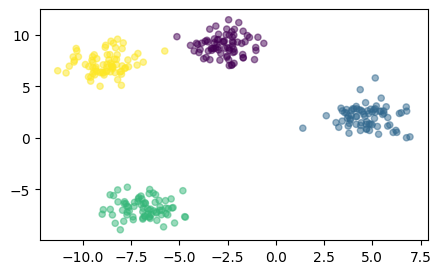

In [18]:
import matplotlib.pyplot as plt

# X[:,0] => X'teki tüm satırların 0. sütunu.
plt.figure(figsize=(5,3))
plt.scatter(      X[:,0], X[:,1], c=y_true, s=20, alpha=0.5  )
plt.show()

In [19]:
import pandas as pd

In [31]:
df = pd.read_csv("Mall_Customers.csv")
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [33]:
X = df[[ "Annual Income (k$)", "Spending Score (1-100)" ]].values

In [34]:
from sklearn.cluster import KMeans

In [37]:
#plt.figure(figsize=(5,3))
#plt.scatter(      X[:,0], X[:,1], s=20, alpha=0.5  )
#plt.show()

In [72]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [73]:
y = model.predict(X)

In [74]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

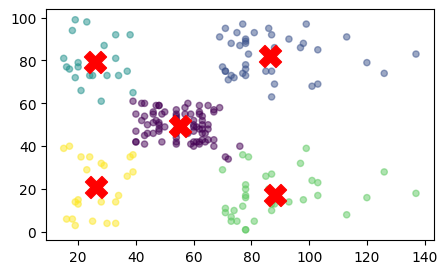

In [75]:
plt.figure(figsize=(5,3))
plt.scatter(      X[:,0], X[:,1], c=y, s=20, alpha=0.5  )
plt.scatter(  model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", marker="X", s=250       )
plt.show()

In [49]:
# K-Means'de n_cluster değerinin en iyi değerini bulmak.

In [53]:
# Elbow Method
# Silhouette Method
# Davies Bouldin Method

In [93]:
# Her k-means modelinde "inertia" değeri var.
def elbow_method():
    inertias = []
    for k in range(2,11): #2,3,4,5
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.figure(figsize=(5,3))
    plt.plot(range(2,11), inertias)
    print(inertias)

[183653.32894736843, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386947, 33642.57922077922, 26686.83778518779, 24766.471609793443, 23103.122085983916]


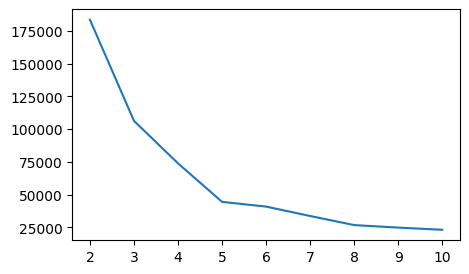

In [94]:
elbow_method()

In [76]:
# Silhouette Method -> Hem kendi merkezime yakınlık hem diğer merkezlere uzaklığa dikkat eder.

In [77]:
from sklearn.metrics import silhouette_score

In [101]:
def silh_method():
    scores = []
    for k in range(2,11):
        model = KMeans(n_clusters=k, random_state=42)
        y = model.fit_predict(X)
        scores.append( silhouette_score(X,y)  )
    plt.figure(figsize=(5,3))
    plt.plot(range(2,11), scores)
    plt.show()

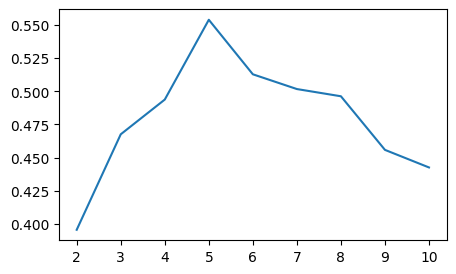

In [102]:
silh_method()

In [103]:
# Davies Bouldin methodunu geliştirelim. ÖDEV 1.

In [104]:
# ÖDEV 2 -> Scaling (Özellik Ölçekleme) hakkında araştırma yapıp bir markdown dosyası oluşturalım.
